In [4]:
pip install tweepy


In [5]:
pip install nltk


In [6]:
pip install openpyxl


In [7]:
import pandas as pd
import time

In [ ]:
# เพิ่มการหน่วงเวลาหลังจากการร้องขอ
time.sleep(15 * 60)  # หยุด 15 นาที (หรือเวลาที่เหมาะสมขึ้นอยู่กับข้อจำกัดของคุณ)


# ฟังก์ชันสำหรับดึงทวีตจาก hashtag
def collect_tweets_v2(bearer_token, hashtag, max_results=50): #ค่าที่ได้max 100 for tw
    import requests

    url = "https://api.twitter.com/2/tweets/search/recent"
    headers = {"Authorization": f"Bearer {bearer_token}"}
    params = {
        "query": hashtag,
        "max_results": max_results,
        "tweet.fields": "text,created_at"
    }

    response = requests.get(url, headers=headers, params=params)
    if response.status_code != 200:
        raise Exception(f"Request failed: {response.status_code}, {response.text}")

    data = response.json()
    tweets = [{"text": tweet["text"], "created_at": tweet["created_at"]} for tweet in data.get("data", [])]
    return tweets

# ตัวอย่างการใช้

# Twitter Bearer Token (replace with your token)
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAANvXyAEAAAAAif28AxYfhBMs8gpubr%2BPN7YyS1E%3DnVX8XlgvfQDJO7mJ1oRbO0mFVVpJ6C1EAgdb7cpsheJsr0wfSp"
hashtag = "#Health"


# ดึงข้อมูลทวีต
tweets_data = collect_tweets_v2(BEARER_TOKEN, hashtag)

# แปลงข้อมูลทวีตให้เป็น DataFrame
df_tweets = pd.DataFrame(tweets_data)

# แสดงข้อมูล DataFrame
print(df_tweets)

# เซฟข้อมูลลงในไฟล์ Excel
file_name = 'tweets_data2.xlsx'
df_tweets.to_excel(file_name, index=False)

print(f"Data saved to {file_name}")

                                                 text  \
0   RT @SavvyHuman: I’m READY!!!😎👌❤️❤️❤️\n#GoldenA...   
1   RT @ClubGymBabes: Follow For More GymBabes! 🍑 ...   
2   #diabetes #diabetesesp #diabetesawareness\n#in...   
3   RT @SavvyHuman: I’m READY!!!😎👌❤️❤️❤️\n#GoldenA...   
4   RT @BayBaysty: Are you interested in an except...   
5   Imagine, @BigImpactHumans, having more #peace,...   
6   Shaban Juma has been recognized as one of the ...   
7   https://t.co/UWJCPLuStR\nmy @enilev🪔mom\n@Beta...   
8   FDA bans Red No. 3 food dye in food, drinks: H...   
9   https://t.co/JKa2qWKcqk\nmy @enilev🪔mom\n@Beta...   
10  RT @NutritiousMind: How we feel in the moment ...   
11  https://t.co/z0BfYHVhNC\nmy @enilev🪔mom\n@Beta...   
12  https://t.co/UUHRGkokiU\nmy @enilev🪔mom\n@Beta...   
13  RT @LavaletteAstrid: @NutritiousMind @smaksked...   
14  RT @john_siracusa: Dr. Lori Shemek - Lose weig...   
15  https://t.co/WwoWmhD2jc\nmy @enilev🪔mom\n@Beta...   
16  https://t.co/yFSiIdRpcO\nmy

In [8]:
pip install pythainlp


pre data

In [9]:
import pandas as pd
import re
import nltk
from pythainlp.tokenize import word_tokenize

# Step 1.1: Preprocess Tweets
def preprocess_tweet(tweet, language='en'):
    if tweet is None:
        return ""  # คืนค่าว่างถ้า tweet เป็น None

    tweet = str(tweet)  # ทำให้มั่นใจว่าเป็นสตริง

    if language == 'th':
        # สำหรับภาษาไทย
        tweet = word_tokenize(tweet)  # ใช้ pythainlp ในการตัดคำภาษาไทย

        # ลบตัวอักษรพิเศษ
        tweet = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(tweet))  # แปลงเป็นสตริงก่อน
        tweet = tweet.lower()

        # โหลด stopwords ภาษาไทย (สามารถใช้จาก `stopwords` หรือสร้างเอง)
        stop_words_th = set([
            'แต่', 'และ', 'ที่', 'จาก', 'เป็น', 'จะ', 'กับ', 'ใน', 'ได้', 'ดังนั้น', 'จากนั้น', 'ซึ่ง', 'นั้น', 'หรือ'
        ])  # เพิ่มเติมคำ stopwords ของคุณเอง

        # ลบคำ stopwords ภาษาไทย
        words = tweet.split()
        words = [word for word in words if word not in stop_words_th]

    else:
        # สำหรับภาษาอังกฤษ
        nltk.download('stopwords')
        stop_words_en = set(stopwords.words('english'))

        # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
        tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
        tweet = tweet.lower()

        # ลบ stopwords
        words = tweet.split()
        words = [word for word in words if word not in stop_words_en]

    return ' '.join(words)


# Step 2: Read Dataset and Apply Preprocessing
def main(file_path):
    # Read the dataset
    df = pd.read_excel(file_path, sheet_name='data')  # อ่านจาก sheet ชื่อ 'data'

    # ตรวจสอบว่าในคอลัมน์ 'tweetText' มีค่าเป็น None หรือไม่
    df['tweetText'] = df['tweetText'].fillna('')

    # ประมวลผลข้อมูล
    df['processed_tweet'] = df['tweetText'].apply(preprocess_tweet, language='th')

    # แสดงตัวอย่างข้อมูล 2 แถวจากแต่ละคลาส
    print("ตัวอย่างข้อมูลที่ผ่านการ preprocess:")
    for label in df['hashtage'].unique():
        print(f"\nคลาส: {label}")
        sample = df[df['hashtage'] == label].head(2)  # เลือก 2 แถวแรกจากแต่ละคลาส
        print(sample[['tweetText', 'processed_tweet']])


# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

ตัวอย่างข้อมูลที่ผ่านการ preprocess:

คลาส: เหลืองส้มดิวะ
                                           tweetText  \
0  @onlynexnx_ ชีเสิร์ฟ เหยิน ฮ็อบ คลินิกทันตกรรม...   
1  @Noeywith789 เหลืองส้มมาเสิร์ฟถึงที่เลยคับ\n#เ...   

                                     processed_tweet  
0  onlynexnx ชี เสิร์ฟ เห ยิน ฮ็อบ คลินิก ทันตกรร...  
1  noeywith789 เหลือง ส้ม มา เสิร์ฟ ถึงที่ เลย คั...  

คลาส: เปิดสวิตช์ความอ่อนเยาว์
                                             tweetText  \
100  อยากเสียว\nแอดไลน์มาได้เลยนะคะพี่\n@tt356มีแอด...   
101  𝙼𝚘𝚘𝚖𝚒𝚗\n\n#ปั๊มไลค์ /#ปั๊มวิว\n\n➥ งานต่างชาติ...   

                                       processed_tweet  
100  อยาก เสียว แอด ไลน์ มา เลย นะคะ พี่ tt356 มี แ...  
101  ปั๊ม ไลค์ ปั๊ม วิว งาน ต่างชาติ มี ตัวตน งาน ไ...  

คลาส: ด้อมภภ
                                             tweetText  \
128  wHATTTTT OMSGSGSGGSGSGSG\n\n#LOfficielThailand...   
129  หนุ่มแบดบอย กับหนุ่มนักฆ่า คาแรคเตอร์มันได้ อิ...   

                                       pro

TF-IDF

In [10]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report

# Step 1: Preprocess Tweets
def preprocess_tweet(tweet):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
    tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
    tweet = tweet.lower()

    # ลบ stopwords
    words = tweet.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Step 2: Feature Extraction using TF-IDF
def extract_features(corpus, model_type='tfidf'):
    if model_type == 'tfidf':
        # ใช้ TfidfVectorizer เพื่อแปลงข้อความเป็นเวกเตอร์
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
        return features, vectorizer
    else:
        raise ValueError("Invalid method: choose 'tfidf'")

# Step 3: Train and Evaluate Models
def train_and_evaluate_models(features, labels):
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # สรุปผลการทดสอบ
        results.append({
            'Model': model_name,
            'Accuracy': round(accuracy, 4),
            'Precision': round(report['accuracy'], 4),
            'Recall': round(report['accuracy'], 4),
            'F1-Score': round(report['accuracy'], 4),
        })

    return pd.DataFrame(results)

# Step 4: Load Dataset from Excel
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='data')
    tweets = df['tweetText'].apply(preprocess_tweet)
    labels = df['hashtage']
    return tweets, labels

# Step 5: Main Function to Execute
def main(file_path):
    tweets, labels = load_data(file_path)

    # Extract features using TF-IDF
    features, vectorizer = extract_features(tweets, model_type='tfidf')

    # Train and Evaluate Models
    results_df = train_and_evaluate_models(features, labels)

    # Show results
    print(results_df)

# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.3837     0.3837  0.3837    0.3837
1                  SVM    0.6512     0.6512  0.6512    0.6512
2        Random Forest    0.6395     0.6395  0.6395    0.6395
3                  KNN    0.5000     0.5000  0.5000    0.5000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


word to vac

In [11]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from gensim.models import Word2Vec

# Step 1: Preprocess Tweets
def preprocess_tweet(tweet):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
    tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
    tweet = tweet.lower()

    # ลบ stopwords
    words = tweet.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Step 2: Feature Extraction using Word2Vec and StandardScaler
def extract_features(corpus, model_type='word2vec'):
    if model_type == 'word2vec':
        # สร้าง model Word2Vec
        model = Word2Vec(corpus, vector_size=100, window=5, min_count=1, workers=4)
        features = []
        for sentence in corpus:
            sentence_vector = np.zeros(100)  # ขนาดเวกเตอร์ที่ใช้
            count = 0
            for word in sentence:
                if word in model.wv:
                    sentence_vector += model.wv[word]
                    count += 1
            if count > 0:
                sentence_vector /= count
            features.append(sentence_vector)

        # ใช้ StandardScaler ในการ normalize ข้อมูล
        scaler = StandardScaler()
        features = scaler.fit_transform(np.array(features))

        return features
    else:
        raise ValueError("Invalid method: choose 'word2vec'")

# Step 3: Train and Evaluate Models
def train_and_evaluate_models(features, labels):
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # สรุปผลการทดสอบ
        results.append({
            'Model': model_name,
            'Accuracy': round(accuracy, 4),
            'Precision': round(report['accuracy'], 4),
            'Recall': round(report['accuracy'], 4),
            'F1-Score': round(report['accuracy'], 4),
        })

    return pd.DataFrame(results)

# Step 4: Load Dataset from Excel
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='data')
    tweets = df['tweetText'].apply(preprocess_tweet)
    labels = df['hashtage']
    return tweets, labels

# Step 5: Main Function to Execute
def main(file_path):
    tweets, labels = load_data(file_path)

    # Tokenize the text into words
    corpus = [tweet.split() for tweet in tweets]

    # Extract features
    features = extract_features(corpus, model_type='word2vec')

    # Train and Evaluate Models
    results_df = train_and_evaluate_models(features, labels)

    # Show results
    print(results_df)

# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.6163     0.6163  0.6163    0.6163
1                  SVM    0.6279     0.6279  0.6279    0.6279
2        Random Forest    0.6512     0.6512  0.6512    0.6512
3                  KNN    0.4884     0.4884  0.4884    0.4884


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Bow

In [12]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

# Step 1: Preprocess Tweets
def preprocess_tweet(tweet):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
    tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
    tweet = tweet.lower()

    # ลบ stopwords
    words = tweet.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Step 2: Feature Extraction using Bag of Words (BoW)
def extract_features(corpus, model_type='bow'):
    if model_type == 'bow':
        # ใช้ CountVectorizer เพื่อแปลงข้อความเป็นเวกเตอร์
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(corpus)
        return features, vectorizer
    else:
        raise ValueError("Invalid method: choose 'bow'")

# Step 3: Train and Evaluate Models
def train_and_evaluate_models(features, labels):
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }

    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

    results = []
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        accuracy = model.score(X_test, y_test)
        y_pred = model.predict(X_test)
        report = classification_report(y_test, y_pred, output_dict=True)

        # สรุปผลการทดสอบ
        results.append({
            'Model': model_name,
            'Accuracy': round(accuracy, 4),
            'Precision': round(report['accuracy'], 4),
            'Recall': round(report['accuracy'], 4),
            'F1-Score': round(report['accuracy'], 4),
        })

    return pd.DataFrame(results)

# Step 4: Load Dataset from Excel
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='data')
    tweets = df['tweetText'].apply(preprocess_tweet)
    labels = df['hashtage']
    return tweets, labels

# Step 5: Main Function to Execute
def main(file_path):
    tweets, labels = load_data(file_path)

    # Extract features using Bag of Words (BoW)
    features, vectorizer = extract_features(tweets, model_type='bow')

    # Train and Evaluate Models
    results_df = train_and_evaluate_models(features, labels)

    # Show results
    print(results_df)

# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

                 Model  Accuracy  Precision  Recall  F1-Score
0  Logistic Regression    0.6163     0.6163  0.6163    0.6163
1                  SVM    0.6163     0.6163  0.6163    0.6163
2        Random Forest    0.6628     0.6628  0.6628    0.6628
3                  KNN    0.4070     0.4070  0.4070    0.4070


Train and test 3 method

In [13]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Step 1: Preprocess Tweets
def preprocess_tweet(tweet):
    nltk.download('stopwords')
    stop_words = set(stopwords.words('english'))

    # Remove mentions, hashtags, URLs, and special characters
    tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
    tweet = tweet.lower()

    # Remove stopwords
    words = tweet.split()
    words = [word for word in words if word not in stop_words]

    return ' '.join(words)

# Step 2: Feature Extraction using Bag of Words, TF-IDF, Word2Vec
def extract_features(corpus, method='bow'):
    if method == 'bow':
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'word2vec':
        model = Word2Vec(sentences=[tweet.split() for tweet in corpus], vector_size=100, window=5, min_count=1, workers=4)
        features = np.array([np.mean([model.wv[word] for word in tweet.split() if word in model.wv] or [np.zeros(100)], axis=0) for tweet in corpus])
    else:
        raise ValueError("Invalid method: choose 'bow', 'tfidf', or 'word2vec'")
    return features

# Step 3: Train and Evaluate Models with Cross-Validation
def train_and_evaluate_models(features, labels, folds=[5, 10]):
    models = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier()
    }

    results = []
    for model_name, model in models.items():
        for fold in folds:
            cv = KFold(n_splits=fold, shuffle=True, random_state=42)
            accuracy = cross_val_score(model, features, labels, cv=cv, scoring='accuracy')
            results.append({
                'Model': model_name,
                'Method': 'BoW',  # Add 'BoW', 'TF-IDF', or 'Word2Vec' based on your extraction method
                'Fold': fold,
                'Mean Accuracy': round(np.mean(accuracy), 4),
                'Standard Deviation': round(np.std(accuracy), 4)
            })
    return pd.DataFrame(results)

# Step 4: Load Dataset from Excel
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='data')
    tweets = df['tweetText'].apply(preprocess_tweet)
    labels = df['hashtage']
    return tweets, labels

# Step 5: Main Function to Execute
def main(file_path):
    tweets, labels = load_data(file_path)

    # Extract features using different methods
    methods = ['bow', 'tfidf', 'word2vec']

    all_results = []
    for method in methods:
        features = extract_features(tweets, method)

        # Train and Evaluate Models
        results_df = train_and_evaluate_models(features, labels)
        results_df['Method'] = method
        all_results.append(results_df)

    # Combine results from all feature extraction methods
    final_results = pd.concat(all_results, ignore_index=True)

    # Show results
    print(final_results)

# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /ro

                  Model    Method  Fold  Mean Accuracy  Standard Deviation
0   Logistic Regression       bow     5         0.5514              0.0409
1   Logistic Regression       bow    10         0.5283              0.0935
2                   SVM       bow     5         0.5538              0.0499
3                   SVM       bow    10         0.5516              0.0767
4         Random Forest       bow     5         0.5537              0.0514
5         Random Forest       bow    10         0.5608              0.1009
6                   KNN       bow     5         0.3972              0.0234
7                   KNN       bow    10         0.3972              0.0613
8   Logistic Regression     tfidf     5         0.4698              0.0521
9   Logistic Regression     tfidf    10         0.4933              0.0996
10                  SVM     tfidf     5         0.5609              0.0716
11                  SVM     tfidf    10         0.5772              0.0922
12        Random Forest  

Ensemble model

In [14]:
import pandas as pd
import re
import nltk
from pythainlp.tokenize import word_tokenize

# Step 1.1: Preprocess Tweets
def preprocess_tweet(tweet, language='en'):
    if tweet is None:
        return ""  # คืนค่าว่างถ้า tweet เป็น None

    tweet = str(tweet)  # ทำให้มั่นใจว่าเป็นสตริง

    if language == 'th':
        # สำหรับภาษาไทย
        tweet = word_tokenize(tweet)  # ใช้ pythainlp ในการตัดคำภาษาไทย

        # ลบตัวอักษรพิเศษ
        tweet = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(tweet))  # แปลงเป็นสตริงก่อน
        tweet = tweet.lower()

        # โหลด stopwords ภาษาไทย (สามารถใช้จาก `stopwords` หรือสร้างเอง)
        stop_words_th = set([
            'แต่', 'และ', 'ที่', 'จาก', 'เป็น', 'จะ', 'กับ', 'ใน', 'ได้', 'ดังนั้น', 'จากนั้น', 'ซึ่ง', 'นั้น', 'หรือ'
        ])  # เพิ่มเติมคำ stopwords ของคุณเอง

        # ลบคำ stopwords ภาษาไทย
        words = tweet.split()
        words = [word for word in words if word not in stop_words_th]

    else:
        # สำหรับภาษาอังกฤษ
        nltk.download('stopwords')
        stop_words_en = set(stopwords.words('english'))

        # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
        tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
        tweet = tweet.lower()

        # ลบ stopwords
        words = tweet.split()
        words = [word for word in words if word not in stop_words_en]

    return ' '.join(words)


# Step 2: Read Dataset and Apply Preprocessing
def main(file_path):
    # Read the dataset
    df = pd.read_excel(file_path, sheet_name='data')  # อ่านจาก sheet ชื่อ 'data'

    # ตรวจสอบว่าในคอลัมน์ 'tweetText' มีค่าเป็น None หรือไม่
    df['tweetText'] = df['tweetText'].fillna('')

    # ประมวลผลข้อมูล
    df['processed_tweet'] = df['tweetText'].apply(preprocess_tweet, language='th')

    # แสดงตัวอย่างข้อมูล 2 แถวจากแต่ละคลาส
    print("ตัวอย่างข้อมูลที่ผ่านการ preprocess:")
    for label in df['hashtage'].unique():
        print(f"\nคลาส: {label}")
        sample = df[df['hashtage'] == label].head(2)  # เลือก 2 แถวแรกจากแต่ละคลาส
        print(sample[['tweetText', 'processed_tweet']])


# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

ตัวอย่างข้อมูลที่ผ่านการ preprocess:

คลาส: เหลืองส้มดิวะ
                                           tweetText  \
0  @onlynexnx_ ชีเสิร์ฟ เหยิน ฮ็อบ คลินิกทันตกรรม...   
1  @Noeywith789 เหลืองส้มมาเสิร์ฟถึงที่เลยคับ\n#เ...   

                                     processed_tweet  
0  onlynexnx ชี เสิร์ฟ เห ยิน ฮ็อบ คลินิก ทันตกรร...  
1  noeywith789 เหลือง ส้ม มา เสิร์ฟ ถึงที่ เลย คั...  

คลาส: เปิดสวิตช์ความอ่อนเยาว์
                                             tweetText  \
100  อยากเสียว\nแอดไลน์มาได้เลยนะคะพี่\n@tt356มีแอด...   
101  𝙼𝚘𝚘𝚖𝚒𝚗\n\n#ปั๊มไลค์ /#ปั๊มวิว\n\n➥ งานต่างชาติ...   

                                       processed_tweet  
100  อยาก เสียว แอด ไลน์ มา เลย นะคะ พี่ tt356 มี แ...  
101  ปั๊ม ไลค์ ปั๊ม วิว งาน ต่างชาติ มี ตัวตน งาน ไ...  

คลาส: ด้อมภภ
                                             tweetText  \
128  wHATTTTT OMSGSGSGGSGSGSG\n\n#LOfficielThailand...   
129  หนุ่มแบดบอย กับหนุ่มนักฆ่า คาแรคเตอร์มันได้ อิ...   

                                       pro

Ensemble_Extraction

In [15]:
import pandas as pd
import re
import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import numpy as np

# Step 1.1: Preprocess Tweets
def preprocess_tweet(tweet, language='en'):
    if tweet is None:
        return ""  # คืนค่าว่างถ้า tweet เป็น None

    tweet = str(tweet)  # ทำให้มั่นใจว่าเป็นสตริง

    if language == 'th':
        # สำหรับภาษาไทย
        tweet = word_tokenize(tweet)  # ใช้ pythainlp ในการตัดคำภาษาไทย

        # ลบตัวอักษรพิเศษ
        tweet = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(tweet))  # แปลงเป็นสตริงก่อน
        tweet = tweet.lower()

        # โหลด stopwords ภาษาไทย (สามารถใช้จาก `stopwords` หรือสร้างเอง)
        stop_words_th = set([
            'แต่', 'และ', 'ที่', 'จาก', 'เป็น', 'จะ', 'กับ', 'ใน', 'ได้', 'ดังนั้น', 'จากนั้น', 'ซึ่ง', 'นั้น', 'หรือ'
        ])  # เพิ่มเติมคำ stopwords ของคุณเอง

        # ลบคำ stopwords ภาษาไทย
        words = tweet.split()
        words = [word for word in words if word not in stop_words_th]

    else:
        # สำหรับภาษาอังกฤษ
        nltk.download('stopwords')
        stop_words_en = set(stopwords.words('english'))

        # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
        tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
        tweet = tweet.lower()

        # ลบ stopwords
        words = tweet.split()
        words = [word for word in words if word not in stop_words_en]

    return ' '.join(words)


# Step 2: Feature Extraction using Bag of Words, TF-IDF, Word2Vec
def extract_features(corpus, method='bow'):
    if method == 'bow':
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'word2vec':
        model = Word2Vec(sentences=[tweet.split() for tweet in corpus], vector_size=100, window=5, min_count=1, workers=4)
        features = np.array([np.mean([model.wv[word] for word in tweet.split() if word in model.wv] or [np.zeros(100)], axis=0) for tweet in corpus])
    else:
        raise ValueError("Invalid method: choose 'bow', 'tfidf', or 'word2vec'")
    return features


# Step 3: Read Dataset and Apply Preprocessing & Feature Extraction
def main(file_path, feature_method='bow'):
    # Read the dataset
    df = pd.read_excel(file_path, sheet_name='data')  # อ่านจาก sheet ชื่อ 'data'

    # ตรวจสอบว่าในคอลัมน์ 'tweetText' มีค่าเป็น None หรือไม่
    df['tweetText'] = df['tweetText'].fillna('')

    # ประมวลผลข้อมูล
    df['processed_tweet'] = df['tweetText'].apply(preprocess_tweet, language='th')

    # ทำการแยกคุณสมบัติ
    features = extract_features(df['processed_tweet'], method=feature_method)

    # แปลง features เป็น DataFrame
    feature_df = pd.DataFrame(features.toarray() if feature_method != 'word2vec' else features)

    # แสดงตัวอย่างข้อมูลหลังการ Feature Extraction
    print(f"\nตัวอย่างข้อมูลหลังการ Feature Extraction ({feature_method}):")
    print(feature_df.head(4))  # แสดงแค่ 4 แถวแรก

# Run the main function with the path to your dataset and feature extraction method
print("ตัวอย่าง Bag of Words:")
main('thai_text_from_hashtage.xlsx', feature_method='bow')  # สามารถเปลี่ยนเป็น 'tfidf' หรือ 'word2vec' ได้

print("\nตัวอย่าง TF-IDF:")
main('thai_text_from_hashtage.xlsx', feature_method='tfidf')  # สามารถเปลี่ยนเป็น 'tfidf' หรือ 'word2vec' ได้

print("\nตัวอย่าง Word2Vec:")
main('thai_text_from_hashtage.xlsx', feature_method='word2vec')  # สามารถเปลี่ยนเป็น 'tfidf' หรือ 'word2vec' ได้

ตัวอย่าง Bag of Words:

ตัวอย่างข้อมูลหลังการ Feature Extraction (bow):
   0     1     2     3     4     5     6     7     8     9     ...  1775  \
0     0     0     0     0     0     0     0     0     0     0  ...     0   
1     0     0     0     0     0     0     0     0     0     0  ...     0   
2     0     0     0     0     0     0     0     0     0     0  ...     0   
3     0     0     0     0     0     0     0     0     0     0  ...     0   

   1776  1777  1778  1779  1780  1781  1782  1783  1784  
0     0     0     0     0     0     0     0     0     0  
1     0     0     0     0     0     0     0     0     0  
2     0     0     0     0     0     0     0     0     0  
3     0     0     0     0     0     0     0     0     0  

[4 rows x 1785 columns]

ตัวอย่าง TF-IDF:

ตัวอย่างข้อมูลหลังการ Feature Extraction (tfidf):
   0     1     2     3     4     5     6     7     8     9     ...  1775  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0

app.py

In [16]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
#from wordcut import wordcut  # Thai word segmentation library
from pythainlp.tokenize import word_tokenize

# Step 1.1: Preprocess Tweets
def preprocess_tweet(tweet, language='en'):
    if tweet is None:
        return ""  # คืนค่าว่างถ้า tweet เป็น None

    tweet = str(tweet)  # ทำให้มั่นใจว่าเป็นสตริง

    if language == 'th':
        # สำหรับภาษาไทย
        tweet = word_tokenize(tweet)  # ใช้ pythainlp ในการตัดคำภาษาไทย

        # ลบตัวอักษรพิเศษ
        tweet = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(tweet))  # แปลงเป็นสตริงก่อน
        tweet = tweet.lower()

        # โหลด stopwords ภาษาไทย (สามารถใช้จาก `stopwords` หรือสร้างเอง)
        stop_words_th = set([
            'แต่', 'และ', 'ที่', 'จาก', 'เป็น', 'จะ', 'กับ', 'ใน', 'ได้', 'ดังนั้น', 'จากนั้น', 'ซึ่ง', 'นั้น', 'หรือ'
        ])  # เพิ่มเติมคำ stopwords ของคุณเอง

        # ลบคำ stopwords ภาษาไทย
        words = tweet.split()
        words = [word for word in words if word not in stop_words_th]

    else:
        # สำหรับภาษาอังกฤษ
        nltk.download('stopwords')
        stop_words_en = set(stopwords.words('english'))

        # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
        tweet = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', tweet)
        tweet = tweet.lower()

        # ลบ stopwords
        words = tweet.split()
        words = [word for word in words if word not in stop_words_en]

    return ' '.join(words)


# Step 1.2: Read Dataset and Apply Preprocessing
def main(file_path):
    # Read the dataset
    df = pd.read_excel(file_path, sheet_name='data')  # อ่านจาก sheet ชื่อ 'data'

    # ตรวจสอบว่าในคอลัมน์ 'tweetText' มีค่าเป็น None หรือไม่
    df['tweetText'] = df['tweetText'].fillna('')

    # ประมวลผลข้อมูล
    df['processed_tweet'] = df['tweetText'].apply(preprocess_tweet, language='th')

    print(df[['tweetText', 'processed_tweet']].head())  # ดูตัวอย่างข้อมูล



# Step 2: Feature Extraction using Bag of Words, TF-IDF, Word2Vec
def extract_features(corpus, method='bow'):
    if method == 'bow':
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'word2vec':
        model = Word2Vec(sentences=[tweet.split() for tweet in corpus], vector_size=100, window=5, min_count=1, workers=4)
        features = np.array([np.mean([model.wv[word] for word in tweet.split() if word in model.wv] or [np.zeros(100)], axis=0) for tweet in corpus])
    else:
        raise ValueError("Invalid method: choose 'bow', 'tfidf', or 'word2vec'")
    return features

# Step 3: Train and Evaluate Ensemble Models with Cross-Validation
def train_and_evaluate_ensemble(features, labels, folds=[5, 10]):
    # Use Ensemble Models such as RandomForest, Gradient Boosting, AdaBoost
    ensemble_models = {
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }

    results = []
    for fold in folds:
        cv = KFold(n_splits=fold, shuffle=True, random_state=42)

        for model_name, model in ensemble_models.items():
            accuracy = cross_val_score(model, features, labels, cv=cv, scoring='accuracy')
            results.append({
                'Method': 'BoW' if fold == 5 else 'TF-IDF',  # Modify as per your extraction method
                'Fold': fold,
                'Model': model_name,
                'Mean Accuracy': round(np.mean(accuracy), 4),
                'Standard Deviation': round(np.std(accuracy), 4)
            })

    return pd.DataFrame(results)

# Step 4: Load Dataset from Excel
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='data')
    tweets = df['tweetText'].apply(preprocess_tweet, language='th')  # ระบุว่าเป็นภาษาไทย
    labels = df['hashtage']
    return tweets, labels

# Step 5: Main Function to Execute
def main(file_path):
    tweets, labels = load_data(file_path)

    # Extract features using different methods
    methods = ['bow', 'tfidf', 'word2vec']

    all_results = []
    for method in methods:
        features = extract_features(tweets, method)

        # Train and Evaluate Ensemble Models
        results_df = train_and_evaluate_ensemble(features, labels)
        results_df['Method'] = method
        all_results.append(results_df)

    # Combine results from all feature extraction methods
    final_results = pd.concat(all_results, ignore_index=True)

    # Show results as a DataFrame with separate fold results
    print(final_results)

# Run the main function with the path to your dataset
main('thai_text_from_hashtage.xlsx')

      Method  Fold              Model  Mean Accuracy  Standard Deviation
0        bow     5      Random Forest         1.0000              0.0000
1        bow     5  Gradient Boosting         1.0000              0.0000
2        bow     5           AdaBoost         1.0000              0.0000
3        bow    10      Random Forest         1.0000              0.0000
4        bow    10  Gradient Boosting         1.0000              0.0000
5        bow    10           AdaBoost         1.0000              0.0000
6      tfidf     5      Random Forest         1.0000              0.0000
7      tfidf     5  Gradient Boosting         1.0000              0.0000
8      tfidf     5           AdaBoost         0.9977              0.0047
9      tfidf    10      Random Forest         1.0000              0.0000
10     tfidf    10  Gradient Boosting         1.0000              0.0000
11     tfidf    10           AdaBoost         1.0000              0.0000
12  word2vec     5      Random Forest         0.978

thai_sentiment

In [22]:
pip install nltk


In [25]:
# -*- coding: utf-8 -*-
"""Thai_Sentiment.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1_fRL5KqoIq1GNuunJOOyXBs7oe5uL6wt
"""

!pip install pythainlp


"""# เปรียบเทียบแต่ละโมเดล"""

import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.metrics import classification_report
from pythainlp.tokenize import word_tokenize

# Step 1: Preprocess Text
def preprocess_text(text, language='th'):
    if text is None:
        return ""  # คืนค่าว่างถ้า text เป็น None

    text = str(text)  # ทำให้มั่นใจว่าเป็นสตริง

    if language == 'th':
        # สำหรับภาษาไทย
        text = word_tokenize(text)  # ใช้ pythainlp ในการตัดคำภาษาไทย

        # ลบตัวอักษรพิเศษ
        text = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(text))
        text = text.lower()

        # ลบ stopwords ภาษาไทย
        stop_words_th = set(['แต่', 'และ', 'ที่', 'จาก', 'เป็น', 'จะ', 'กับ', 'ใน', 'ได้', 'ดังนั้น', 'จากนั้น', 'ซึ่ง', 'นั้น', 'หรือ'])
        words = text.split()
        words = [word for word in words if word not in stop_words_th]
    else:
        # สำหรับภาษาอังกฤษ
        nltk.download('stopwords')
        stop_words_en = set(stopwords.words('english'))

        # ลบ mentions, hashtags, URLs, และตัวอักษรพิเศษ
        text = re.sub(r'@\w+|#\w+|http\S+|[^A-Za-z0-9 ]+', '', text)
        text = text.lower()

        # ลบ stopwords
        words = text.split()
        words = [word for word in words if word not in stop_words_en]

    return ' '.join(words)

# Step 2: Load Dataset
def load_data(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('')
    df['processed_text'] = df['Text'].apply(preprocess_text, language='th')
    labels = df['Class']
    return df['processed_text'], labels

# Step 3: Feature Extraction
def extract_features(corpus, method='bow'):
    if method == 'bow':
        vectorizer = CountVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'tfidf':
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    elif method == 'word2vec':
        model = Word2Vec(sentences=[text.split() for text in corpus], vector_size=100, window=5, min_count=1, workers=4)
        features = np.array([np.mean([model.wv[word] for word in text.split() if word in model.wv] or [np.zeros(100)], axis=0) for text in corpus])
    else:
        raise ValueError("Invalid method: choose 'bow', 'tfidf', or 'word2vec'")
    return features

# Step 4: Train and Evaluate
def train_and_evaluate_ensemble(features, labels, folds=5):
    models = {
        'Random Forest': RandomForestClassifier(),
        'Gradient Boosting': GradientBoostingClassifier(),
        'AdaBoost': AdaBoostClassifier()
    }

    results = []
    cv = KFold(n_splits=folds, shuffle=True, random_state=42)

    for model_name, model in models.items():
        accuracy = cross_val_score(model, features, labels, cv=cv, scoring='accuracy')
        results.append({
            'Model': model_name,
            'Mean Accuracy': round(np.mean(accuracy), 4),
            'Standard Deviation': round(np.std(accuracy), 4)
        })

    return pd.DataFrame(results)

# Step 5: Main Function
def main(file_path):
    texts, labels = load_data(file_path)

    # Feature Extraction
    methods = ['bow', 'tfidf', 'word2vec']
    all_results = []

    for method in methods:
        features = extract_features(texts, method)
        results_df = train_and_evaluate_ensemble(features, labels)
        results_df['Method'] = method
        all_results.append(results_df)

    final_results = pd.concat(all_results, ignore_index=True)
    print(final_results)

# Execute
main('Thai_Sentiment.xlsx')

               Model  Mean Accuracy  Standard Deviation    Method
0      Random Forest         0.8247              0.0087       bow
1  Gradient Boosting         0.7238              0.0262       bow
2           AdaBoost         0.6674              0.0363       bow
3      Random Forest         0.8285              0.0106     tfidf
4  Gradient Boosting         0.7222              0.0270     tfidf
5           AdaBoost         0.6685              0.0368     tfidf
6      Random Forest         0.8307              0.0251  word2vec
7  Gradient Boosting         0.8077              0.0157  word2vec
8           AdaBoost         0.6438              0.0303  word2vec


Random Forest_word2vec

In [49]:

import pandas as pd
import numpy as np
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from gensim.models import Word2Vec
from pythainlp.tokenize import word_tokenize

# ฟังก์ชันสำหรับการประมวลผลข้อความ
def preprocess_text(text):
    if text is None:
        return ""  # คืนค่าว่างถ้าข้อความเป็น None

    text = str(text)  # ทำให้มั่นใจว่าเป็นสตริง
    words = word_tokenize(text)  # ใช้ pythainlp ในการตัดคำภาษาไทย
    text = ' '.join(words)  # รวมคำที่ตัดแล้วกลับมาเป็นข้อความเดียว
    text = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', text)  # ลบตัวอักษรพิเศษ
    return text

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ด้วย Word2Vec
def extract_features_word2vec(corpus):
    model = Word2Vec(sentences=[text.split() for text in corpus], vector_size=100, window=5, min_count=1, workers=4)
    features = np.array([
        np.mean([model.wv[word] for word in text.split() if word in model.wv] or [np.zeros(100)], axis=0)
        for text in corpus
    ])
    return features, model

# ฟังก์ชันสำหรับการฝึกและบันทึกโมเดล
def train_and_save_model(features, labels, save_path='random_forest_model.pkl'):
    model = RandomForestClassifier(random_state=42)
    model.fit(features, labels)

    # บันทึกโมเดลด้วย pickle
    with open(save_path, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model saved to {save_path}")
    return model

# ฟังก์ชันสำหรับการทดสอบโมเดล
def test_model(test_texts, w2v_model, loaded_model):
    processed_texts = [preprocess_text(text) for text in test_texts]
    test_features = np.array([
        np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv] or [np.zeros(100)], axis=0)
        for text in processed_texts
    ])
    predictions = loaded_model.predict(test_features)
    return predictions

# ฟังก์ชันหลัก
def main(file_path):
    # โหลดข้อมูลจากไฟล์ Excel
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('').apply(preprocess_text)  # ประมวลผลข้อความ

    # แบ่งข้อมูลเป็นชุด Train และ Test
    X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

    # แปลงข้อความเป็นฟีเจอร์ด้วย Word2Vec
    train_features, w2v_model = extract_features_word2vec(X_train)

    # ฝึกและบันทึกโมเดล
    model = train_and_save_model(train_features, y_train)

    # โหลดโมเดลที่บันทึกไว้
    with open('random_forest_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # ทดสอบโมเดลด้วยชุดทดสอบ
    predictions = test_model(X_test, w2v_model, loaded_model)
    print("Predictions:", predictions)

    # แสดงผลลัพธ์การประเมิน
    accuracy = np.mean(predictions == y_test)
    print(f"Accuracy: {accuracy:.4f}")

    # แสดง Classification Report โดยให้ทศนิยม 4 ตำแหน่ง
    print("Classification Report:")
    report = classification_report(y_test, predictions, output_dict=True)

    # แปลงข้อมูลใน classification report เป็น DataFrame
    report_df = pd.DataFrame(report).T

    # จัดรูปแบบให้มีทศนิยม 4 ตำแหน่ง
    report_df = report_df.round(4)

    # แสดงตาราง
    print(report_df)

# เรียกใช้งานฟังก์ชันหลัก
main('Thai_Sentiment.xlsx')

Model saved to random_forest_model.pkl
Predictions: ['negative' 'negative' 'negative' 'negative' 'swear' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'positive' 'positive' 'negative' 'swear' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative' 'nega

In [50]:
"""# Test by New data"""

import pickle
import numpy as np
import pandas as pd
import re
from pythainlp.tokenize import word_tokenize
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier

# ฟังก์ชันสำหรับการประมวลผลข้อความ
def preprocess_text(text):
    return re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(word_tokenize(str(text or ""))))

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ด้วย Word2Vec
def extract_features_word2vec(corpus):
    model = Word2Vec(sentences=[text.split() for text in corpus], vector_size=100, window=5, min_count=1, workers=4)
    features = np.array([np.mean([model.wv[w] for w in text.split() if w in model.wv] or [np.zeros(100)], axis=0) for text in corpus])
    return features, model

# ฟังก์ชันสำหรับฝึกและบันทึกโมเดล
def train_and_save_model(features, labels, model_path='random_forest_model.pkl'):
    model = RandomForestClassifier().fit(features, labels)
    with open(model_path, 'wb') as f: pickle.dump(model, f)
    return model

# ฟังก์ชันสำหรับการทำนายผล
def predict_new_data(new_data, w2v_model, model_path='random_forest_model.pkl'):
    features = np.array([np.mean([w2v_model.wv[w] for w in preprocess_text(text).split() if w in w2v_model.wv] or [np.zeros(100)], axis=0) for text in new_data])
    with open(model_path, 'rb') as f: model = pickle.load(f)
    return model.predict(features)

# ฟังก์ชันหลัก
def main(file_path):
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('').apply(preprocess_text)
    features, w2v_model = extract_features_word2vec(df['Text'])
    train_and_save_model(features, df['Class'])

    while True:
        text = input("กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): ")
        if text.lower() == 'exit': break
        print(f"ผลลัพธ์การทำนาย: {predict_new_data([text], w2v_model)[0]}")

# เรียกใช้งานฟังก์ชันหลัก
main('Thai_Sentiment.xlsx')

กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): ฉันรักเธอ
ผลลัพธ์การทำนาย: positive
กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): exit


# [Random Forest TF-IDF]

In [52]:
import pandas as pd
import numpy as np
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
from pythainlp.tokenize import word_tokenize

# ฟังก์ชันสำหรับการประมวลผลข้อความ
def preprocess_text(text):
    if text is None:
        return ""  # คืนค่าว่างถ้าข้อความเป็น None

    text = str(text)  # ทำให้มั่นใจว่าเป็นสตริง
    words = word_tokenize(text)  # ใช้ pythainlp ในการตัดคำภาษาไทย
    text = ' '.join(words)  # รวมคำที่ตัดแล้วกลับมาเป็นข้อความเดียว
    text = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', text)  # ลบตัวอักษรพิเศษ
    return text

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ด้วย TF-IDF
def extract_features_tfidf(corpus):
    vectorizer = TfidfVectorizer(max_features=1000)  # จำกัดจำนวนฟีเจอร์ที่ใช้
    features = vectorizer.fit_transform(corpus)
    return features, vectorizer

# ฟังก์ชันสำหรับการฝึกและบันทึกโมเดล
def train_and_save_model(features, labels, save_path='random_forest_tfidf_model.pkl'):
    model = RandomForestClassifier(random_state=42)
    model.fit(features, labels)

    # บันทึกโมเดลด้วย pickle
    with open(save_path, 'wb') as file:
        pickle.dump(model, file)

    print(f"Model saved to {save_path}")
    return model

# ฟังก์ชันสำหรับการทดสอบโมเดล
def test_model(test_features, loaded_model):
    predictions = loaded_model.predict(test_features)
    return predictions

# ฟังก์ชันหลัก
def main(file_path):
    # โหลดข้อมูลจากไฟล์ Excel
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('').apply(preprocess_text)  # ประมวลผลข้อความ

    # แบ่งข้อมูลเป็นชุด Train และ Test
    X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

    # แปลงข้อความเป็นฟีเจอร์ด้วย TF-IDF
    train_features, tfidf_vectorizer = extract_features_tfidf(X_train)

    # ฝึกและบันทึกโมเดล
    model = train_and_save_model(train_features, y_train)

    # โหลดโมเดลที่บันทึกไว้
    with open('random_forest_tfidf_model.pkl', 'rb') as file:
        loaded_model = pickle.load(file)

    # ทดสอบโมเดลด้วยชุดทดสอบ
    test_features = tfidf_vectorizer.transform(X_test)
    predictions = test_model(test_features, loaded_model)
    print("Predictions:", predictions)

    # แสดงผลลัพธ์การประเมิน
    accuracy = np.mean(predictions == y_test)
    print(f"Accuracy: {accuracy:.4f}")

    # แสดง Classification Report โดยให้ทศนิยม 4 ตำแหน่ง
    print("Classification Report:")
    report = classification_report(y_test, predictions, output_dict=True)

    # แปลงข้อมูลใน classification report เป็น DataFrame
    report_df = pd.DataFrame(report).T

    # จัดรูปแบบให้มีทศนิยม 4 ตำแหน่ง
    report_df = report_df.round(4)

    # แสดงตาราง
    print(report_df)

# เรียกใช้งานฟังก์ชันหลัก
main('Thai_Sentiment.xlsx')


Model saved to random_forest_tfidf_model.pkl
Predictions: ['negative' 'negative' 'negative' 'negative' 'swear' 'negative' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'positive' 'negative' 'positive' 'positive' 'negative' 'swear' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'negative' 'positive' 'negative'

In [53]:
"""# Test by New data"""

import pickle
import numpy as np
import pandas as pd
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from pythainlp.tokenize import word_tokenize

# ฟังก์ชันสำหรับการประมวลผลข้อความ
def preprocess_text(text):
    return re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(word_tokenize(str(text or ""))))

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ด้วย TF-IDF
def extract_features_tfidf(corpus):
    vectorizer = TfidfVectorizer(max_features=1000)  # จำกัดฟีเจอร์สูงสุดที่ 1000
    features = vectorizer.fit_transform(corpus)
    return features, vectorizer

# ฟังก์ชันสำหรับฝึกและบันทึกโมเดล
def train_and_save_model(features, labels, model_path='random_forest_tfidf_model.pkl'):
    model = RandomForestClassifier(random_state=42)
    model.fit(features, labels)
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {model_path}")
    return model

# ฟังก์ชันสำหรับการทำนายผล
def predict_new_data(new_data, tfidf_vectorizer, model_path='random_forest_tfidf_model.pkl'):
    # แปลงข้อความใหม่เป็นฟีเจอร์ด้วย TF-IDF
    features = tfidf_vectorizer.transform([preprocess_text(text) for text in new_data])
    with open(model_path, 'rb') as f:
        model = pickle.load(f)
    return model.predict(features)

# ฟังก์ชันหลัก
def main(file_path):
    # โหลดข้อมูล
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('').apply(preprocess_text)

    # สร้างฟีเจอร์ด้วย TF-IDF
    features, tfidf_vectorizer = extract_features_tfidf(df['Text'])

    # ฝึกและบันทึกโมเดล
    train_and_save_model(features, df['Class'])

    # รับข้อความใหม่และทำนายผล
    while True:
        text = input("กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): ")
        if text.lower() == 'exit':
            break
        prediction = predict_new_data([text], tfidf_vectorizer)
        print(f"ผลลัพธ์การทำนาย: {prediction[0]}")

# เรียกใช้งานฟังก์ชันหลัก
main('Thai_Sentiment.xlsx')


Model saved to random_forest_tfidf_model.pkl
กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): ฉันรักเธอ
ผลลัพธ์การทำนาย: negative
กรุณากรอกข้อความ (หรือพิมพ์ 'exit' เพื่อออก): exit


Gradient Boosting แบบ word2vec

In [54]:
"""# Gradient Boosting with Word2Vec and Classification Report"""

import pickle
import numpy as np
import pandas as pd
import re
from gensim.models import Word2Vec
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from pythainlp.tokenize import word_tokenize

# ฟังก์ชันสำหรับการประมวลผลข้อความ
def preprocess_text(text):
    return re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', ' '.join(word_tokenize(str(text or ""))))

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ด้วย Word2Vec
def extract_features_word2vec(corpus):
    model = Word2Vec(sentences=[text.split() for text in corpus], vector_size=100, window=5, min_count=1, workers=4)
    features = np.array([
        np.mean([model.wv[word] for word in text.split() if word in model.wv] or [np.zeros(100)], axis=0)
        for text in corpus
    ])
    return features, model

# ฟังก์ชันสำหรับฝึกและบันทึกโมเดล
def train_and_save_model(features, labels, model_path='gradient_boosting_model.pkl'):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(features, labels)
    with open(model_path, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved to {model_path}")
    return model

# ฟังก์ชันหลัก
def main(file_path):
    # โหลดข้อมูล
    df = pd.read_excel(file_path, sheet_name='Sheet1')
    df['Text'] = df['Text'].fillna('').apply(preprocess_text)

    # แบ่งข้อมูลเป็นชุด Train และ Test
    X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['Class'], test_size=0.2, random_state=42)

    # สร้างฟีเจอร์ด้วย Word2Vec
    train_features, w2v_model = extract_features_word2vec(X_train)
    test_features = np.array([
        np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv] or [np.zeros(100)], axis=0)
        for text in X_test
    ])

    # ฝึกและบันทึกโมเดล
    train_and_save_model(train_features, y_train)

    # โหลดโมเดลที่ฝึกไว้
    with open('gradient_boosting_model.pkl', 'rb') as f:
        model = pickle.load(f)

    # ทำการทำนายผล
    predictions = model.predict(test_features)

    # แสดงผลลัพธ์ของ Classification Report
    print("\nClassification Report:")
    report = classification_report(y_test, predictions, digits=4)
    print(report)


# เรียกใช้งานฟังก์ชันหลัก
main('Thai_Sentiment.xlsx')


Model saved to gradient_boosting_model.pkl

Classification Report:
              precision    recall  f1-score   support

    negative     0.8913    0.6862    0.7754       239
    positive     1.0000    0.5091    0.6747       110
       swear     0.0480    0.3750    0.0851        16

    accuracy                         0.6192       365
   macro avg     0.6464    0.5234    0.5117       365
weighted avg     0.8871    0.6192    0.7148       365



deploy 1 g per model

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦
changed 22 packages in 4s
⠦
⠦3 packages are looking for funding
⠦  run `npm fund` for details
⠦Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://a2bc-34-125-197-63.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://a2bc-34-125-197-63.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:17:37] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:17:38] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:17:40] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:17:41] "GET / HTTP/1.1" 200 -
<ipython-input-66-5430843b6538>:129: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-66-5430843b6538>:129: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-66-5430843b6538>:129: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-66-5430843b6538>:129: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-66-5430843b6538>:129: UserWarning: Glyph 36

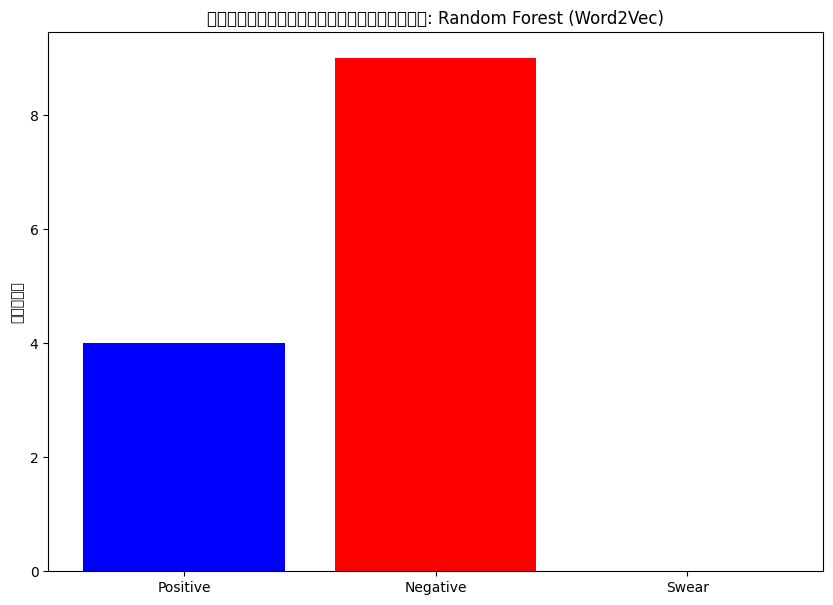

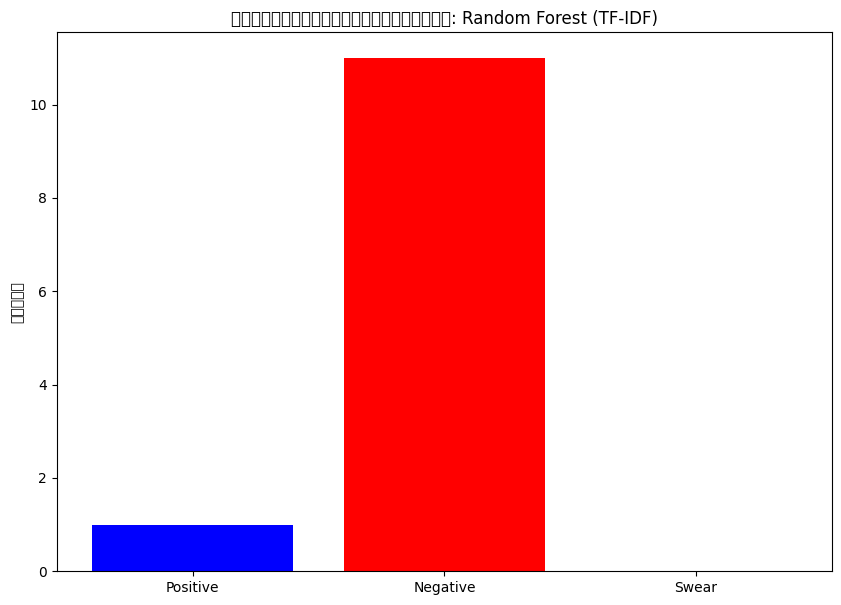

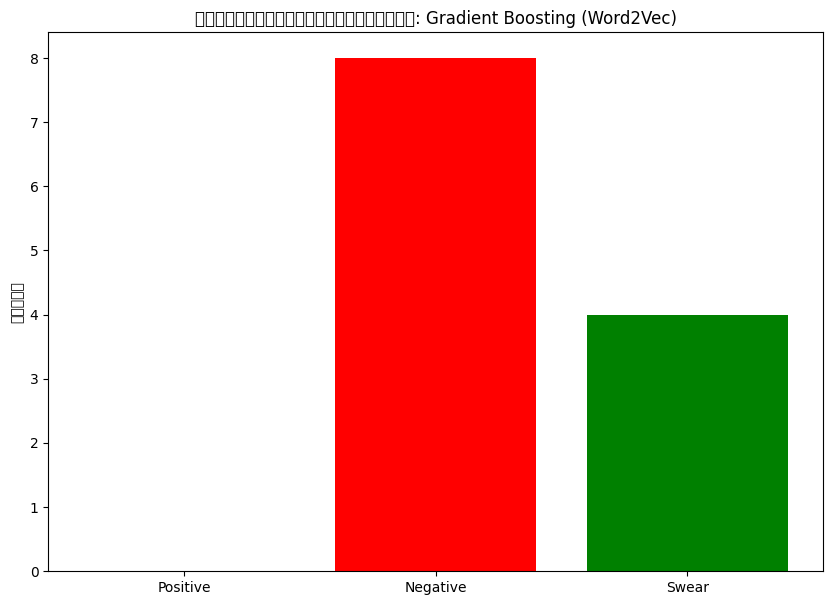

In [66]:
# -*- coding: utf-8 -*-
"""DeployTextModel.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1xAycJeCrmy2fdVjL67SiSwkxQeWEzLzh

# Install
"""

# สมัคร ngrok.com
!pip install flask flask-ngrok gensim pythainlp scikit-learn pandas numpy openpyxl

!pip install matplotlib flask flask-ngrok

!pip install pyngrok

!npm install -g localtunnel

#authtoken ของใครของมันจ๊ะ
!ngrok authtoken 2s0bI5hhFxx5wZZNVs3QNXwLsDv_88bEHUWGaWLrJKvUZpFxr

!pip install matplotlib

"""# เปิด tunnel ของ ngrok"""

from pyngrok import ngrok

# ตรวจสอบว่ามี tunnel ที่เปิดอยู่หรือไม่
existing_tunnels = ngrok.get_tunnels()
if not existing_tunnels:
    public_url = ngrok.connect(5000)  # เปิด tunnel ใหม่ถ้าไม่มี
    print(f"Public URL: {public_url}")
else:
    print("Existing Tunnel:", existing_tunnels[0].public_url)  # ใช้ tunnel ที่มีอยู่

"""# วิเคราะห์ผลความรู้สึก และ Report"""

# -*- coding: utf-8 -*-
from flask import Flask, request, render_template_string, send_file
from flask_ngrok import run_with_ngrok
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import pickle
import re
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import os
import signal

# ฟังก์ชันสำหรับประมวลผลข้อความ
def preprocess_text(text):
    if text is None:
        return ""
    text = str(text)
    words = word_tokenize(text)
    text = ' '.join(words)
    text = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', text)
    return text

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ TF-IDF
def extract_features_tfidf(corpus, vectorizer=None):
    if vectorizer is None:
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    else:
        features = vectorizer.transform(corpus)
    return features, vectorizer

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ Word2Vec
def extract_features_word2vec(corpus, w2v_model):
    return np.array([np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv] or [np.zeros(100)], axis=0) for text in corpus])

# ฟังก์ชันสำหรับบันทึกข้อมูลลงไฟล์
def save_to_file(input_text, predictions):
    with open("analysis_results.txt", "a", encoding="utf-8") as file:
        file.write(f"ข้อความ: {input_text}\n")
        for model_name, prediction in predictions.items():
            file.write(f"{model_name}: {prediction}\n")
        file.write("\n")

# ฟังก์ชันที่หยุดเซิร์ฟเวอร์ Flask
def shutdown_server():
    os.kill(os.getpid(), signal.SIGINT)

# โหลดข้อมูลและโมเดล
df = pd.read_excel('Thai_Sentiment.xlsx')
df['Text'] = df['Text'].apply(preprocess_text)

# สร้าง Word2Vec โมเดล
w2v_model = Word2Vec(sentences=[text.split() for text in df['Text']], vector_size=100, window=5, min_count=1, workers=4)

# สร้าง TF-IDF โมเดล
tfidf_features, tfidf_vectorizer = extract_features_tfidf(df['Text'])

# โหลดโมเดลที่บันทึกไว้
with open('random_forest_model.pkl', 'rb') as file:
    rf_word2vec = pickle.load(file)

with open('random_forest_tfidf_model.pkl', 'rb') as file:
    rf_tfidf = pickle.load(file)

with open('gradient_boosting_model.pkl', 'rb') as file:
    gb_word2vec = pickle.load(file)

def plot_bar_chart_per_model(sentiment_counts, model_name):
    fig, ax = plt.subplots(figsize=(10, 7))

    # แยกกราฟสำหรับแต่ละโมเดล
    ax.bar(['Positive', 'Negative', 'Swear'], [
        sentiment_counts[model_name]['positive'],
        sentiment_counts[model_name]['negative'],
        sentiment_counts[model_name]['swear']
    ], color=['blue', 'red', 'green'])

    ax.set_ylabel('จำนวน')
    ax.set_title(f'ผลการวิเคราะห์จากโมเดล: {model_name}')
    ax.set_xticks(['Positive', 'Negative', 'Swear'])

    # Save bar chart to a BytesIO object and return the image
    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    return img


def count_sentiment_types(file_path, model_names):
    sentiment_counts = {model: {'positive': 0, 'negative': 0, 'swear': 0} for model in model_names}

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for i in range(0, len(lines), 3):
        result_line = lines[i + 1]
        for model_name in model_names:
            if model_name in result_line:
                if 'swear' in result_line:
                    sentiment_counts[model_name]['swear'] += 1
                elif 'positive' in result_line:
                    sentiment_counts[model_name]['positive'] += 1
                elif 'negative' in result_line:
                    sentiment_counts[model_name]['negative'] += 1

    return sentiment_counts


# สร้าง Flask App
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template_string('''
        <h1>Thai Sentiment Analysis</h1>
        <form method="POST" action="/predict">
            <label>กรอกข้อความภาษาไทย:</label><br>
            <input type="text" name="text" style="width: 300px;"><br><br>
            <input type="submit" value="วิเคราะห์">
        </form>
        <br>
        <a href="/result">ดูผลการวิเคราะห์ทั้งหมด</a><br><br>
        <form method="POST" action="/shutdown">
            <input type="submit" value="ปิดเซิร์ฟเวอร์">
        </form>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    user_text = request.form['text']
    processed_text = preprocess_text(user_text)

    # แปลงข้อความเป็นฟีเจอร์
    word2vec_features = extract_features_word2vec([processed_text], w2v_model)
    tfidf_features, _ = extract_features_tfidf([processed_text], tfidf_vectorizer)

    # ทำนายผลด้วยโมเดลทั้ง 3
    rf_word2vec_prediction = rf_word2vec.predict(word2vec_features)[0]
    rf_tfidf_prediction = rf_tfidf.predict(tfidf_features)[0]
    gb_word2vec_prediction = gb_word2vec.predict(word2vec_features)[0]

    # รวบรวมผลลัพธ์
    predictions = {
        "Random Forest (Word2Vec)": rf_word2vec_prediction,
        "Random Forest (TF-IDF)": rf_tfidf_prediction,
        "Gradient Boosting (Word2Vec)": gb_word2vec_prediction
    }

    # บันทึกข้อความและผลการวิเคราะห์ลงไฟล์
    save_to_file(user_text, predictions)

    # แสดงผลลัพธ์
    result_html = ''.join([f"<p>{model}: {pred}</p>" for model, pred in predictions.items()])
    return f"<h3>ผลการวิเคราะห์:</h3>{result_html}<br><a href='/'>กลับหน้าหลัก</a>"

@app.route('/result')
def result():
    # นับผลการวิเคราะห์จากไฟล์
    model_names = ["Random Forest (Word2Vec)", "Random Forest (TF-IDF)", "Gradient Boosting (Word2Vec)"]
    sentiment_counts = count_sentiment_types('analysis_results.txt', model_names)

    # สร้างกราฟแท่งสำหรับแต่ละโมเดล
    img_base64_list = []
    for model_name in model_names:
        img = plot_bar_chart_per_model(sentiment_counts, model_name)

        # แปลงภาพกราฟแท่งเป็น base64 สำหรับการแสดงใน HTML
        img_base64 = base64.b64encode(img.getvalue()).decode('utf-8')
        img_base64_list.append(img_base64)

    return render_template_string('''
        <h1>ผลการวิเคราะห์ทั้งหมด</h1>
        {% for img_data in img_data_list %}
            <img src="data:image/png;base64,{{ img_data }}" alt="Bar Chart"><br><br>
        {% endfor %}
        <a href="/">กลับหน้าหลัก</a>
    ''', img_data_list=img_base64_list)


@app.route('/shutdown', methods=['POST'])
def shutdown():
    shutdown_server()
    return 'Server shutting down...'

if __name__ == '__main__':
    app.run()

deploy 1g per 3 model

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 22 packages in 4s
⠙
⠙3 packages are looking for funding
⠙  run `npm fund` for details
⠙Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
Public URL: NgrokTunnel: "https://e0ce-34-125-197-63.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://e0ce-34-125-197-63.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:33:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:33:36] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:33:39] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Jan/2025 04:33:40] "GET / HTTP/1.1" 200 -
<ipython-input-68-2d60dcaf5e91>:126: UserWarning: Glyph 3592 (\N{THAI CHARACTER CHO CHAN}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-68-2d60dcaf5e91>:126: UserWarning: Glyph 3635 (\N{THAI CHARACTER SARA AM}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-68-2d60dcaf5e91>:126: UserWarning: Glyph 3609 (\N{THAI CHARACTER NO NU}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-68-2d60dcaf5e91>:126: UserWarning: Glyph 3623 (\N{THAI CHARACTER WO WAEN}) missing from font(s) DejaVu Sans.
  plt.savefig(img, format='png')
<ipython-input-68-2d60dcaf5e91>:126: UserWarning: Glyph 36

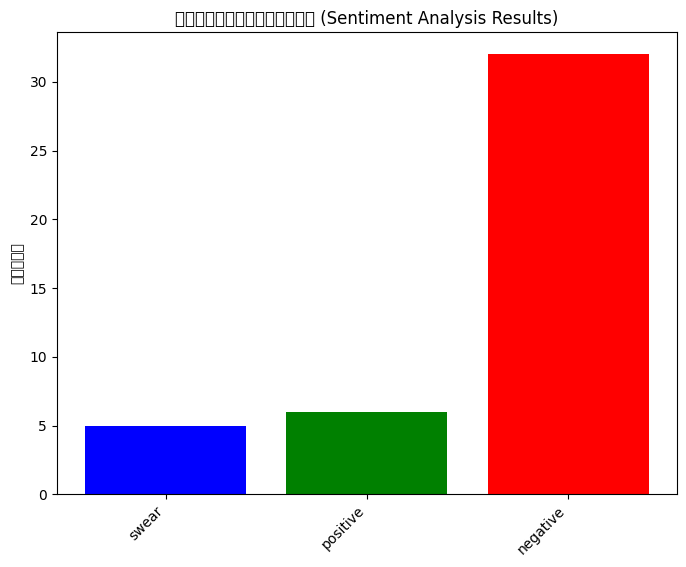

In [68]:
# -*- coding: utf-8 -*-
"""DeployTextModel.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1xAycJeCrmy2fdVjL67SiSwkxQeWEzLzh

# Install
"""

# สมัคร ngrok.com
!pip install flask flask-ngrok gensim pythainlp scikit-learn pandas numpy openpyxl

!pip install matplotlib flask flask-ngrok

!pip install pyngrok

!npm install -g localtunnel

#authtoken ของใครของมันจ๊ะ
!ngrok authtoken 2s0bI5hhFxx5wZZNVs3QNXwLsDv_88bEHUWGaWLrJKvUZpFxr

!pip install matplotlib

"""# เปิด tunnel ของ ngrok"""

from pyngrok import ngrok

# ตรวจสอบว่ามี tunnel ที่เปิดอยู่หรือไม่
existing_tunnels = ngrok.get_tunnels()
if not existing_tunnels:
    public_url = ngrok.connect(5000)  # เปิด tunnel ใหม่ถ้าไม่มี
    print(f"Public URL: {public_url}")
else:
    print("Existing Tunnel:", existing_tunnels[0].public_url)  # ใช้ tunnel ที่มีอยู่

"""# วิเคราะห์ผลความรู้สึก และ Report"""

# -*- coding: utf-8 -*-
from flask import Flask, request, render_template_string, send_file
from flask_ngrok import run_with_ngrok
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report
import pickle
import re
from pythainlp.tokenize import word_tokenize
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import os
import signal

# ฟังก์ชันสำหรับประมวลผลข้อความ
def preprocess_text(text):
    if text is None:
        return ""
    text = str(text)
    words = word_tokenize(text)
    text = ' '.join(words)
    text = re.sub(r'[^ก-๙a-zA-Z0-9 ]+', '', text)
    return text

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ TF-IDF
def extract_features_tfidf(corpus, vectorizer=None):
    if vectorizer is None:
        vectorizer = TfidfVectorizer()
        features = vectorizer.fit_transform(corpus)
    else:
        features = vectorizer.transform(corpus)
    return features, vectorizer

# ฟังก์ชันสำหรับแปลงข้อความเป็นฟีเจอร์ Word2Vec
def extract_features_word2vec(corpus, w2v_model):
    return np.array([np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv] or [np.zeros(100)], axis=0) for text in corpus])

# ฟังก์ชันสำหรับบันทึกข้อมูลลงไฟล์
def save_to_file(input_text, predictions):
    with open("analysis_results.txt", "a", encoding="utf-8") as file:
        file.write(f"ข้อความ: {input_text}\n")
        for model_name, prediction in predictions.items():
            file.write(f"{model_name}: {prediction}\n")
        file.write("\n")

# ฟังก์ชันที่หยุดเซิร์ฟเวอร์ Flask
def shutdown_server():
    os.kill(os.getpid(), signal.SIGINT)

# โหลดข้อมูลและโมเดล
df = pd.read_excel('Thai_Sentiment.xlsx')
df['Text'] = df['Text'].apply(preprocess_text)

# สร้าง Word2Vec โมเดล
w2v_model = Word2Vec(sentences=[text.split() for text in df['Text']], vector_size=100, window=5, min_count=1, workers=4)

# สร้าง TF-IDF โมเดล
tfidf_features, tfidf_vectorizer = extract_features_tfidf(df['Text'])

# โหลดโมเดลที่บันทึกไว้
with open('random_forest_model.pkl', 'rb') as file:
    rf_word2vec = pickle.load(file)

with open('random_forest_tfidf_model.pkl', 'rb') as file:
    rf_tfidf = pickle.load(file)

with open('gradient_boosting_model.pkl', 'rb') as file:
    gb_word2vec = pickle.load(file)

# ฟังก์ชันสำหรับแสดงกราฟแท่ง (Bar Chart)
def plot_bar_chart(sentiment_counts):
    labels = sentiment_counts.keys()
    values = sentiment_counts.values()

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.bar(labels, values, color=['blue', 'green', 'red'])
    ax.set_ylabel('จำนวน')
    ax.set_title('ผลการวิเคราะห์ (Sentiment Analysis Results)')
    plt.xticks(rotation=45, ha='right')

    # Save bar chart to a BytesIO object and return the image
    img = BytesIO()
    plt.savefig(img, format='png')
    img.seek(0)
    return img

# ฟังก์ชันสำหรับนับประเภทของผลการวิเคราะห์
def count_sentiment_types(file_path):
    sentiment_counts = {'swear': 0, 'positive': 0, 'negative': 0}

    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    for i in range(0, len(lines), 3):
        result_line = lines[i + 1]
        if 'swear' in result_line:
            sentiment_counts['swear'] += 1
        elif 'positive' in result_line:
            sentiment_counts['positive'] += 1
        elif 'negative' in result_line:
            sentiment_counts['negative'] += 1

    return sentiment_counts


# สร้าง Flask App
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
    return render_template_string('''
        <h1>Thai Sentiment Analysis</h1>
        <form method="POST" action="/predict">
            <label>กรอกข้อความภาษาไทย:</label><br>
            <input type="text" name="text" style="width: 300px;"><br><br>
            <input type="submit" value="วิเคราะห์">
        </form>
        <br>
        <a href="/result">ดูผลการวิเคราะห์ทั้งหมด</a><br><br>
        <form method="POST" action="/shutdown">
            <input type="submit" value="ปิดเซิร์ฟเวอร์">
        </form>
    ''')

@app.route('/predict', methods=['POST'])
def predict():
    user_text = request.form['text']
    processed_text = preprocess_text(user_text)

    # แปลงข้อความเป็นฟีเจอร์
    word2vec_features = extract_features_word2vec([processed_text], w2v_model)
    tfidf_features, _ = extract_features_tfidf([processed_text], tfidf_vectorizer)

    # ทำนายผลด้วยโมเดลทั้ง 3
    rf_word2vec_prediction = rf_word2vec.predict(word2vec_features)[0]
    rf_tfidf_prediction = rf_tfidf.predict(tfidf_features)[0]
    gb_word2vec_prediction = gb_word2vec.predict(word2vec_features)[0]

    # รวบรวมผลลัพธ์
    predictions = {
        "Random Forest (Word2Vec)": rf_word2vec_prediction,
        "Random Forest (TF-IDF)": rf_tfidf_prediction,
        "Gradient Boosting (Word2Vec)": gb_word2vec_prediction
    }

    # บันทึกข้อความและผลการวิเคราะห์ลงไฟล์
    save_to_file(user_text, predictions)

    # แสดงผลลัพธ์
    result_html = ''.join([f"<p>{model}: {pred}</p>" for model, pred in predictions.items()])
    return f"<h3>ผลการวิเคราะห์:</h3>{result_html}<br><a href='/'>กลับหน้าหลัก</a>"

@app.route('/result')
def result():
    # นับผลการวิเคราะห์จากไฟล์
    sentiment_counts = count_sentiment_types('analysis_results.txt')

    # สร้างกราฟแท่ง
    img = plot_bar_chart(sentiment_counts)

    # แปลงภาพกราฟแท่งเป็น base64 สำหรับการแสดงใน HTML
    img_base64 = base64.b64encode(img.getvalue()).decode('utf-8')

    return render_template_string('''
        <h1>ผลการวิเคราะห์ทั้งหมด</h1>
        <img src="data:image/png;base64,{{img_data}}" alt="Bar Chart">
        <br><br>
        <a href="/">กลับหน้าหลัก</a>
    ''', img_data=img_base64)


@app.route('/shutdown', methods=['POST'])
def shutdown():
    shutdown_server()
    return 'Server shutting down...'

if __name__ == '__main__':
    app.run()
